In [35]:
import os
import flopy
import numpy as np
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
from ipywidgets import interact

In [36]:
model_ws = 'Results'
modelname = 'test'
exe_name = '../Exe/mf2005.exe'
mf = flopy.modflow.Modflow(modelname,  model_ws=model_ws)

In [37]:
# dis
nlay, nrow, ncol = 3, 100, 100
delr = delc = 10.
top = 330.
botm = [300.,290.,280.]
#for i in range(ncol):
#    botm[0,:,i]=315-i*0.15
#    botm[1,:,i]=317-i*0.15
#    botm[2,:,i]=316-i*0.15
    
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=top, botm=botm)
#dis.plot()

In [55]:

bas = flopy.modflow.ModflowBas(mf, ibound=1, strt=320)
lpf = flopy.modflow.ModflowLpf(mf, hk=[1600,1600,1600], vka=[1500,1500,1500], laytyp=[0,0,0], ipakcb=53)

In [56]:
#rch = flopy.modflow.ModflowRch(mf,rech=-0.005)

In [63]:
spd = []
for i in range(10):
    a = [1,50,45+i,-60000]
    spd.append(a)
spd = {0:spd}
wel = flopy.modflow.ModflowWel(mf,stress_period_data=spd)
spd_v = [[0,i,0,320,1e5,318] for i in range(nrow)]
spd_riv={0: [[0, i, 99, 305, 1e5, 318] for i in range(nrow)]+spd_v}
riv = flopy.modflow.ModflowRiv(mf,stress_period_data=spd_riv)

In [64]:
spd = {(0,0):['print head','print budget','save head','save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data = spd, compact = True)

In [65]:
pcg = flopy.modflow.ModflowPcg(mf)
mf.write_input()
mf.run_model()

FloPy is using the following  executable to run the model: E:\Program Files (x86)\GW7\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: test.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/11/22 13:56:44

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/11/22 13:56:44
 Elapsed run time:  0.075 Seconds

  Normal termination of simulation


(True, [])

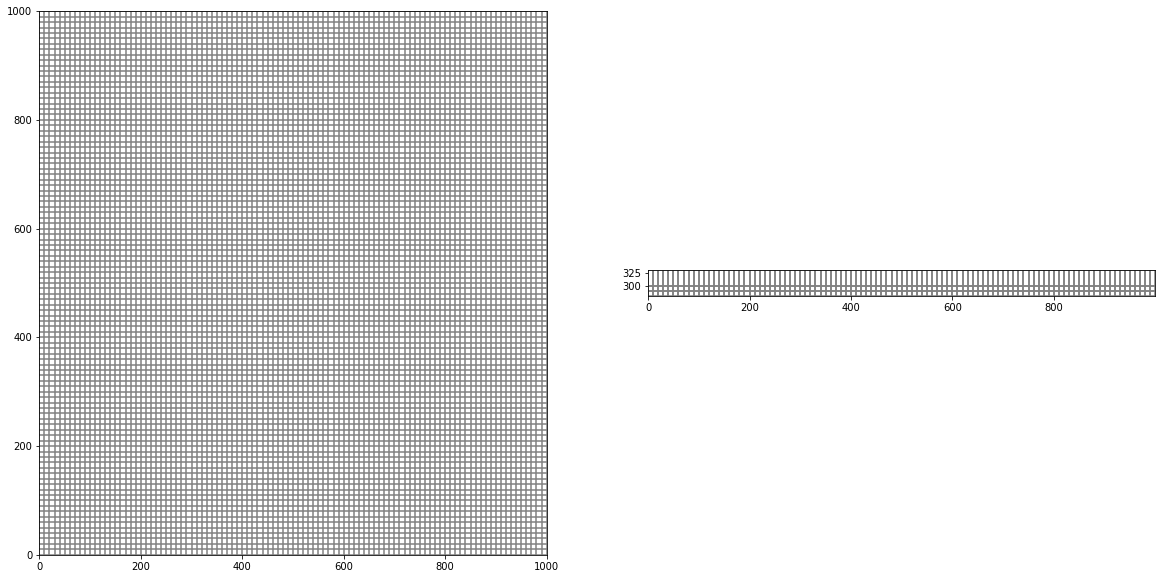

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
mapview = flopy.plot.PlotMapView(model = mf)
linecollection = mapview.plot_grid(ax=ax1)
mapview.plot_ibound(ax=ax1)

xsect = flopy.plot.PlotCrossSection(model = mf, line = {'Column':10})
linecollection = xsect.plot_grid(ax=ax2)

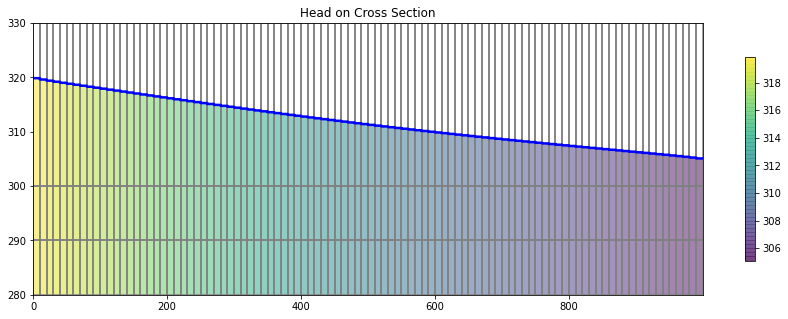

In [67]:
# import head
hds = bf.HeadFile(model_ws+'/'+modelname+'.hds')
head = hds.get_data(totim=1.0)
# plot
fig,ax = plt.subplots(figsize = (15,5))
ax.set_title('Head on Cross Section')

# color grid
xsect = flopy.plot.PlotCrossSection(model = mf, line = {'Row':10})
pc = xsect.plot_array(head,masked_values=[999.],head = head,alpha = 0.5)
cb = plt.colorbar(pc,shrink = 0.75)
linecollection = xsect.plot_grid()
# water table
wt = xsect.plot_surface(head[0],masked_values=[999.],color = 'blue',lw=2.5)

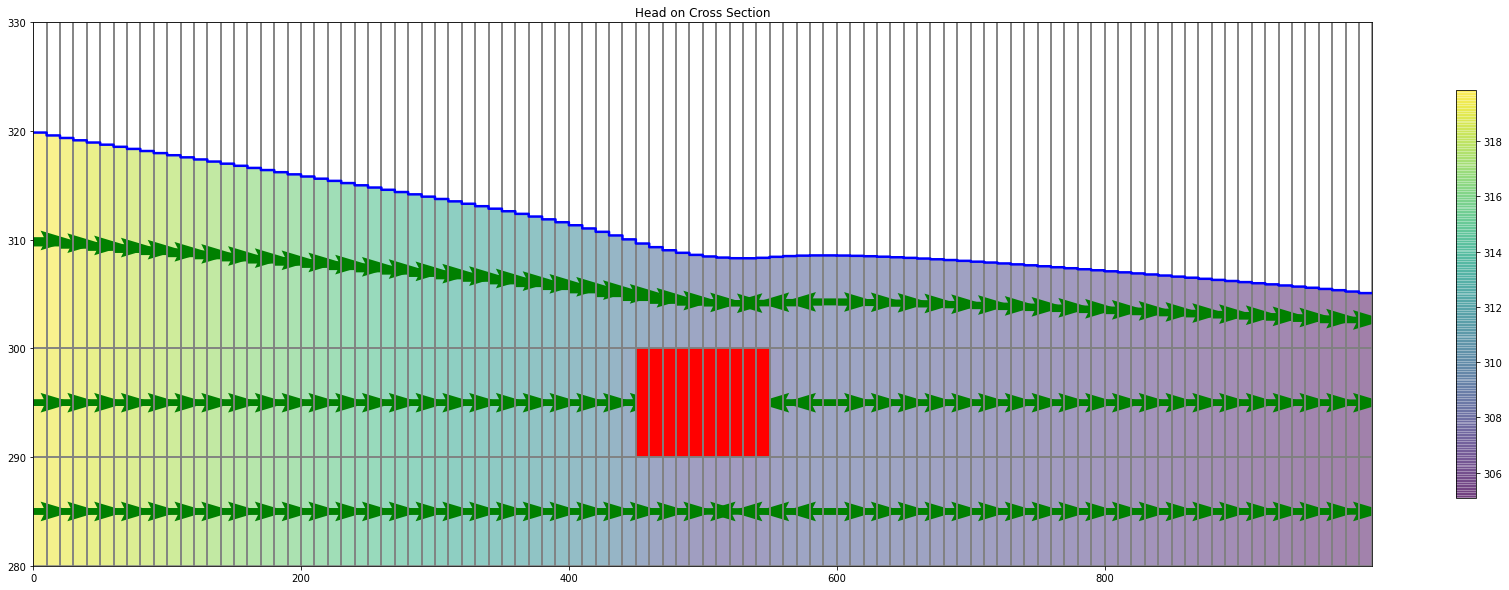

In [68]:
# import head
hds = bf.HeadFile(model_ws+'/'+modelname+'.hds')
head = hds.get_data(totim=1.0)
# import cbc
fname = os.path.join(model_ws,modelname+'.cbc')
cbb = flopy.utils.CellBudgetFile(fname)
frf = cbb.get_data(text = 'FLOW RIGHT FACE')[0]
fff = cbb.get_data(text = 'FLOW FRONT FACE')[0]
# plot
fig,ax = plt.subplots(figsize = (30,10))
ax.set_title('Head on Cross Section')

# color grid
xsect = flopy.plot.PlotCrossSection(model = mf, line = {'Row':50})
pc = xsect.plot_array(head,masked_values=[999.],head = head,alpha = 0.5)
cb = plt.colorbar(pc,shrink = 0.75)
# quiver
quiver = xsect.plot_discharge(frf,fff,head=head,hstep = 2,normalize = True,
                             color = 'green', scale = 20)
xsect.plot_bc('wel')
linecollection = xsect.plot_grid()
# water table
wt = xsect.plot_surface(head[0],masked_values=[999.],color = 'blue',lw=2.5)

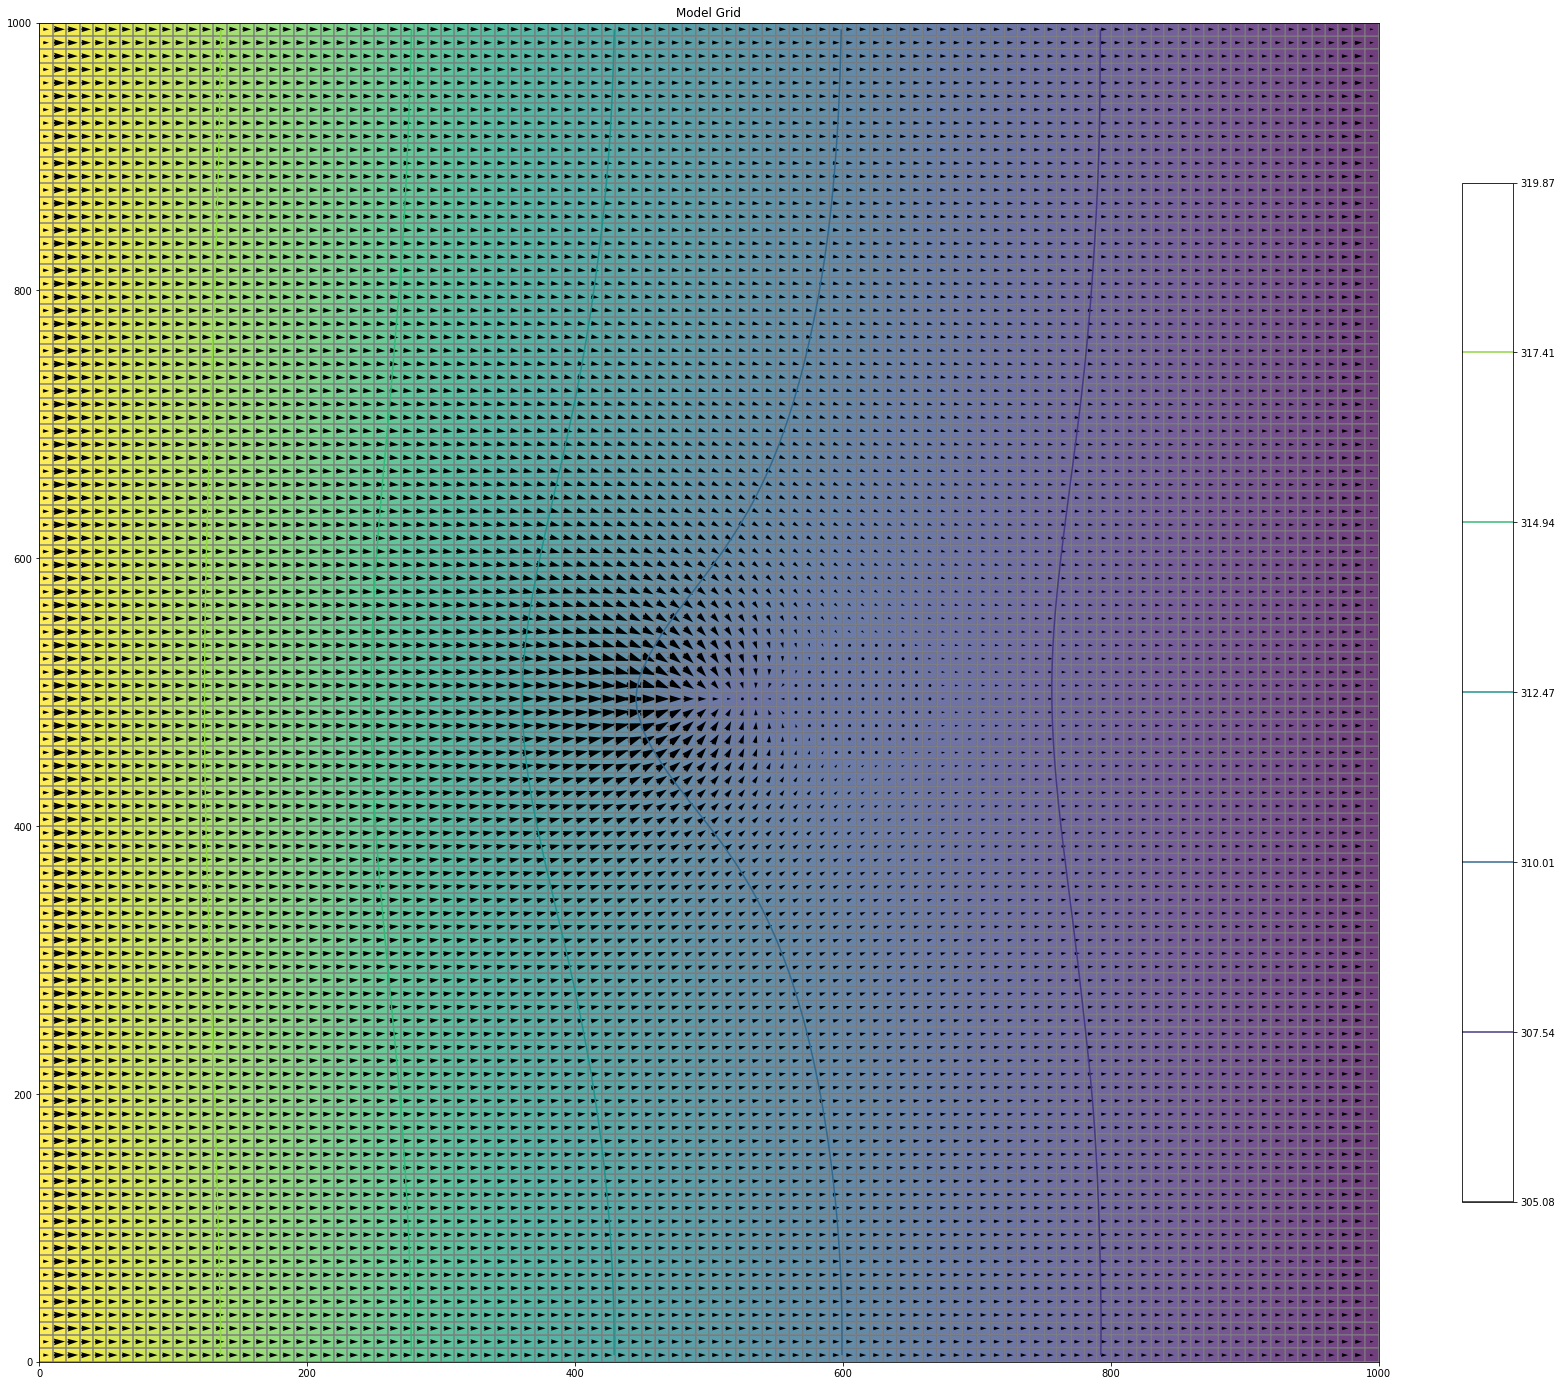

In [69]:

cbb = flopy.utils.CellBudgetFile('Results/test.cbc')
frf = cbb.get_data(text = 'FLOW RIGHT FACE')[0]
fff = cbb.get_data(text = 'FLOW FRONT FACE')[0]

fig = plt.figure(figsize = (30,25))
ax = plt.subplot(1,1,1,aspect = 'equal')

mapview = flopy.plot.PlotMapView(model = mf)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(head[0,:,:], alpha = 0.5)
quiver = mapview.plot_discharge(frf,fff)
linecollection = mapview.plot_grid()
mapview.plot_ibound()
contour = mapview.contour_array(head[0,:,:])
t = ax.set_title("Model Grid")
plt.colorbar(contour,shrink = 0.75)

flopy.modflow.ModflowLpf?